# Sample Code to handle TCGA data

In [1]:
import sys
sys.path.append("C:/github") # path for tcgautil module
sys.path.append("C:/github/deconv") # path for deconv module
from tcgautil.tcgautil import tcgautil as util

In C:\ProgramData\Anaconda3\envs\JL\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\envs\JL\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\envs\JL\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\envs\JL\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\envs\JL\lib\site-packages\matplo

In [2]:
### file path
# TCGA data
transcript="D:/2018KatsuhisaM/datasource/Prognosis/hcc/tcga/gdc_download_20201208_111743.796983"
meta="D:/2018KatsuhisaM/datasource/Prognosis/hcc/tcga/metadata.cart.2020-12-08.json"
sample="D:/2018KatsuhisaM/datasource/Prognosis/hcc/tcga/gdc_sample_sheet.2020-12-08.tsv"
clinical="D:/2018KatsuhisaM/datasource/Prognosis/hcc/tcga/clinical.cart.2020-12-08/clinical.tsv"

# annotation
file_ann = "D:/2018KatsuhisaM/datasource/ann_file/HumanEnsembleID2HGNC.csv"

# For deconvolution reference
file_ref = "D:/2018KatsuhisaM/datasource/Deconvolution/cibersort/exp_all_quantile.csv"

# export folder
folder = "D:/2018KatsuhisaM/datasource/Prognosis/hcc/tcga/data/"

In [3]:
# load data from files
dat = util.tcgautil()
dat.load(transcript=transcript, meta=meta, sample=sample, clinical=clinical)

file loading
completed


In [4]:
# process data for analysis
dat.processing(file_ann=file_ann,quantile=True, combat=True, cutoff=1.0, intersection=True, batch_target=["plate"], par_prioe=False)

Conducting ComBat : plate
Found 20 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.


C:\ProgramData\Anaconda3\envs\JL\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Finding parametric adjustments.
Adjusting the Data
e
drop 1 samples by clinical data missing


In [5]:
# Estimate immune cell population
dat.deconvolution(df_ref=file_ref)

strategy: median
0
extracted genes number = 7553
1
extracted genes number = 4754
2
extracted genes number = 5629
3
extracted genes number = 5621
4
extracted genes number = 5713
5
extracted genes number = 5549
standardz population control
100standardz population control
mix data is read as dataframe
ref data is read as dataframe
number of used genes = 660
fitting method : NuSVR


In [6]:
# analysis 1
dat.add_immune(method="IQR", iqrco=0.5)

<lifelines.CoxPHFitter: fitted with 398 total observations, 252 right-censored observations>
             duration col = 'OS_Time'
                event col = 'OS_Status'
      baseline estimation = breslow
   number of observations = 398
number of events observed = 146
   partial log-likelihood = -756.34
         time fit was run = 2020-12-11 12:49:24 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
B-cells       0.08       1.08       0.18            -0.27             0.42                 0.76                 1.53
CD4          -0.27       0.76       0.19            -0.64             0.10                 0.53                 1.10
CD8          -0.36       0.70       0.22            -0.79             0.07                 0.45                 1.08
Monocytes     0.24       1.27       0.18            -0.11             0.59                 0.89                 1.81
NK           -0.15       0.86       0.20            -0.54             0.25                 0.58                 1.28
Neutrophils  -0.19       0.83       0.18            -0.54             0.17                 0.58                 1.18

                z    p   -log2(p)
covariate                        
B-cells      0.43 0.67       0.58
CD4         -1.45 0.15       2.76
CD8         -1.63 0.10       3.28
Monocytes    1.33 0.18       2.45
NK          -0.73 0.47       1.10
Neutrophils -1.03 0.30       1.73
---
Concordance = 0.56
Partial AIC = 1524.67
log-likelihood ratio test = 6.78 on 6 df
-log2(p) of ll-ratio test = 1.55

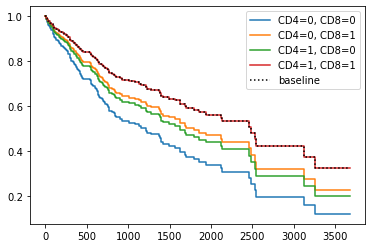

In [10]:
# plot interesting immune classification
dat.plot_KM_immune(target=["CD4","CD8"])

In [8]:
# Export files to folder path
dat.export_path(folder)

In [9]:
dat.get_transcript().index

Index(['RAB4B', 'TIGAR', 'RNF44', 'RPL23A', 'ARL8B', 'MFSD3', 'PIGV', 'RMND5A',
       'RAD23A', 'SIN3B',
       ...
       'ELOVL6', 'CABIN1', 'CNDP2', 'IL15RA', 'ELAVL1', 'RBAK', 'ARHGAP21',
       'POMZP3', 'CYP4F2', 'PPP6R1'],
      dtype='object', length=9800)